In [1]:
import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout

import warnings
warnings.filterwarnings('ignore')


# Reading the dataset

In [3]:
df=pd.read_csv("Churn_Modelling.csv")
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

## Checking for Null Values

In [7]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Splitting the dataset

In [9]:
df[['Surname']].value_counts()[0:60]

Surname    
Smith          32
Martin         29
Scott          29
Walker         28
Brown          26
Shih           25
Genovese       25
Yeh            25
Wright         24
Maclean        24
Fanucci        23
White          23
Wilson         23
Ma             23
Chu            22
Moore          22
Johnson        22
Wang           22
Lu             22
McGregor       21
Sun            21
Thompson       21
Mai            21
Palerma        20
Shen           20
Trevisani      20
Hughes         20
Graham         20
Fang           20
Mitchell       20
Jamieson       20
Kao            20
Miller         20
Young          20
Kennedy        20
Watson         20
Lo             20
Kerr           20
Duncan         19
Wallace        19
Pan            19
Tuan           19
McKay          19
Gordon         19
Anderson       19
Ts'ui          19
Cameron        19
Bergamaschi    19
Pai            19
Lung           19
Ko             19
Crawford       19
Wei            19
McDonald       19
H?             1

In [10]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [11]:
df.drop(['Surname'],axis=1,inplace=True)

In [12]:
df

RowNumber  CustomerId  CreditScore Geography  Gender  Age  Tenure  \
0             1    15634602          619    France  Female   42       2   
1             2    15647311          608     Spain  Female   41       1   
2             3    15619304          502    France  Female   42       8   
3             4    15701354          699    France  Female   39       1   
4             5    15737888          850     Spain  Female   43       2   
...         ...         ...          ...       ...     ...  ...     ...   
9995       9996    15606229          771    France    Male   39       5   
9996       9997    15569892          516    France    Male   35      10   
9997       9998    15584532          709    France  Female   36       7   
9998       9999    15682355          772   Germany    Male   42       3   
9999      10000    15628319          792    France  Female   28       4   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0          0.00              1          1               1        101348.88   
1      83807.86              1          0               1        112542.58   
2     159660.80              3          1               0        113931.57   
3          0.00              2          0               0         93826.63   
4     125510.82              1          1               1         79084.10   
...         ...            ...        ...             ...              ...   
9995       0.00              2          1               0         96270.64   
9996   57369.61              1          1               1        101699.77   
9997       0.00              1          0               1         42085.58   
9998   75075.31              2          1               0         92888.52   
9999  130142.79              1          1               0         38190.78   

      Exited  
0          1  
1          0  
2          1  
3          0  
4          0  
...      ...  
9995       0  
9996       0  
9997       1  
9998       1  
9999       0  

[10000 rows x 13 columns]

In [13]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'])


In [14]:
df.replace({True:1,False:0},inplace=True)

In [15]:
df

RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  \
0             1    15634602          619   42       2       0.00   
1             2    15647311          608   41       1   83807.86   
2             3    15619304          502   42       8  159660.80   
3             4    15701354          699   39       1       0.00   
4             5    15737888          850   43       2  125510.82   
...         ...         ...          ...  ...     ...        ...   
9995       9996    15606229          771   39       5       0.00   
9996       9997    15569892          516   35      10   57369.61   
9997       9998    15584532          709   36       7       0.00   
9998       9999    15682355          772   42       3   75075.31   
9999      10000    15628319          792   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0                 1          1               1        101348.88       1   
1                 1          0               1        112542.58       0   
2                 3          1               0        113931.57       1   
3                 2          0               0         93826.63       0   
4                 1          1               1         79084.10       0   
...             ...        ...             ...              ...     ...   
9995              2          1               0         96270.64       0   
9996              1          1               1        101699.77       0   
9997              1          0               1         42085.58       1   
9998              2          1               0         92888.52       1   
9999              1          1               0         38190.78       0   

      Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
0                    1                  0                0              1   
1                    0                  0                1              1   
2                    1                  0                0              1   
3                    1                  0                0              1   
4                    0                  0                1              1   
...                ...                ...              ...            ...   
9995                 1                  0                0              0   
9996                 1                  0                0              0   
9997                 1                  0                0              1   
9998                 0                  1                0              0   
9999                 1                  0                0              1   

      Gender_Male  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
9995            1  
9996            1  
9997            0  
9998            1  
9999            0  

[10000 rows x 16 columns]

In [16]:
x= df.drop(['RowNumber','Exited'],axis=1)
x

CustomerId  CreditScore  Age  Tenure    Balance  NumOfProducts  \
0       15634602          619   42       2       0.00              1   
1       15647311          608   41       1   83807.86              1   
2       15619304          502   42       8  159660.80              3   
3       15701354          699   39       1       0.00              2   
4       15737888          850   43       2  125510.82              1   
...          ...          ...  ...     ...        ...            ...   
9995    15606229          771   39       5       0.00              2   
9996    15569892          516   35      10   57369.61              1   
9997    15584532          709   36       7       0.00              1   
9998    15682355          772   42       3   75075.31              2   
9999    15628319          792   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Geography_France  \
0             1               1        101348.88                 1   
1             0               1        112542.58                 0   
2             1               0        113931.57                 1   
3             0               0         93826.63                 1   
4             1               1         79084.10                 0   
...         ...             ...              ...               ...   
9995          1               0         96270.64                 1   
9996          1               1        101699.77                 1   
9997          0               1         42085.58                 1   
9998          1               0         92888.52                 0   
9999          1               0         38190.78                 1   

      Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                     0                0              1            0  
1                     0                1              1            0  
2                     0                0              1            0  
3                     0                0              1            0  
4                     0                1              1            0  
...                 ...              ...            ...          ...  
9995                  0                0              0            1  
9996                  0                0              0            1  
9997                  0                0              1            0  
9998                  1                0              0            1  
9999                  0                0              1            0  

[10000 rows x 14 columns]

In [17]:
y=df[['Exited']]
y

Exited
0          1
1          0
2          1
3          0
4          0
...      ...
9995       0
9996       0
9997       1
9998       1
9999       0

[10000 rows x 1 columns]

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

In [19]:
xtrain.shape

(8000, 14)

In [20]:
xtest.shape

(2000, 14)

# Scaling 

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
mm= MinMaxScaler()
array1= mm.fit_transform(xtrain)
array2=mm.fit_transform(xtest)

In [24]:
array1

array([[0.14168324, 0.672     , 0.18918919, ..., 0.        , 0.        ,
        1.        ],
       [0.80282366, 0.564     , 0.32432432, ..., 0.        , 0.        ,
        1.        ],
       [0.60527126, 0.418     , 0.08108108, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.03260535, 0.77      , 0.27027027, ..., 0.        , 1.        ,
        0.        ],
       [0.96800675, 0.634     , 0.33783784, ..., 0.        , 0.        ,
        1.        ],
       [0.56236023, 0.694     , 0.44594595, ..., 0.        , 0.        ,
        1.        ]])

In [25]:
array2

array([[0.48702538, 0.492     , 0.18918919, ..., 0.        , 0.        ,
        1.        ],
       [0.68497985, 0.546     , 0.33783784, ..., 0.        , 0.        ,
        1.        ],
       [0.62402615, 0.502     , 0.35135135, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.72383769, 0.76      , 0.39189189, ..., 0.        , 1.        ,
        0.        ],
       [0.49338364, 0.684     , 0.14864865, ..., 0.        , 0.        ,
        1.        ],
       [0.34351429, 0.556     , 0.28378378, ..., 0.        , 0.        ,
        1.        ]])

In [26]:
xtrain = pd.DataFrame(array1,columns=xtrain.columns)
xtest = pd.DataFrame(array2,columns=xtest.columns)

## neural network

In [28]:
nn = Sequential()
nn.add(Dense(256,input_dim=14, activation='relu'))
nn.add(Dropout(0.5))
nn.add(Dense(128, activation='relu'))
nn.add(Dropout(0.5))
nn.add(Dense(64, activation='relu'))
nn.add(Dropout(0.5))
nn.add(Dense(32, activation='relu'))
nn.add(Dropout(0.5))
nn.add(Dense(16, activation='relu'))
nn.add(Dropout(0.5))
nn.add(Dense(1,activation='sigmoid'))

In [29]:
nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,617 (186.00 KB)

 Trainable params: 47,617 (186.00 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
nn.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [31]:
model = nn.fit(xtrain, ytrain, validation_split=0.20, epochs=100)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7409 - loss: 0.5851 - val_accuracy: 0.7987 - val_loss: 0.4908
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7935 - loss: 0.5321 - val_accuracy: 0.7987 - val_loss: 0.4883
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7938 - loss: 0.5005 - val_accuracy: 0.7987 - val_loss: 0.4672
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7893 - loss: 0.4989 - val_accuracy: 0.7987 - val_loss: 0.4646
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7896 - loss: 0.5008 - val_accuracy: 0.7987 - val_loss: 0.4740
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7980 - loss: 0.4767 - val_accuracy: 0.7987 - val_loss: 0.4633
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7976 - loss: 0.4730 - val_accuracy: 0.7987 - val_loss: 0.4442
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7987 - loss: 0.4578 - val_ac

In [32]:
xtrain.shape

(8000, 14)

In [33]:
model.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [34]:
model.history['accuracy']

[0.7768750190734863,
 0.7931249737739563,
 0.7934374809265137,
 0.7931249737739563,
 0.7934374809265137,
 0.7934374809265137,
 0.7934374809265137,
 0.7934374809265137,
 0.7934374809265137,
 0.7934374809265137,
 0.7934374809265137,
 0.7934374809265137,
 0.7934374809265137,
 0.7934374809265137,
 0.7934374809265137,
 0.7934374809265137,
 0.7934374809265137,
 0.7934374809265137,
 0.7934374809265137,
 0.7934374809265137,
 0.7934374809265137,
 0.7934374809265137,
 0.7934374809265137,
 0.7934374809265137,
 0.7934374809265137,
 0.7934374809265137,
 0.7934374809265137,
 0.7934374809265137,
 0.7934374809265137,
 0.7934374809265137,
 0.7934374809265137,
 0.7934374809265137,
 0.7934374809265137,
 0.7934374809265137,
 0.7934374809265137,
 0.8090624809265137,
 0.839062511920929,
 0.8415625095367432,
 0.83984375,
 0.8364062309265137,
 0.8417187333106995,
 0.8465625047683716,
 0.8439062237739563,
 0.8478124737739563,
 0.8420312404632568,
 0.8465625047683716,
 0.8482812643051147,
 0.8465625047683716,
 

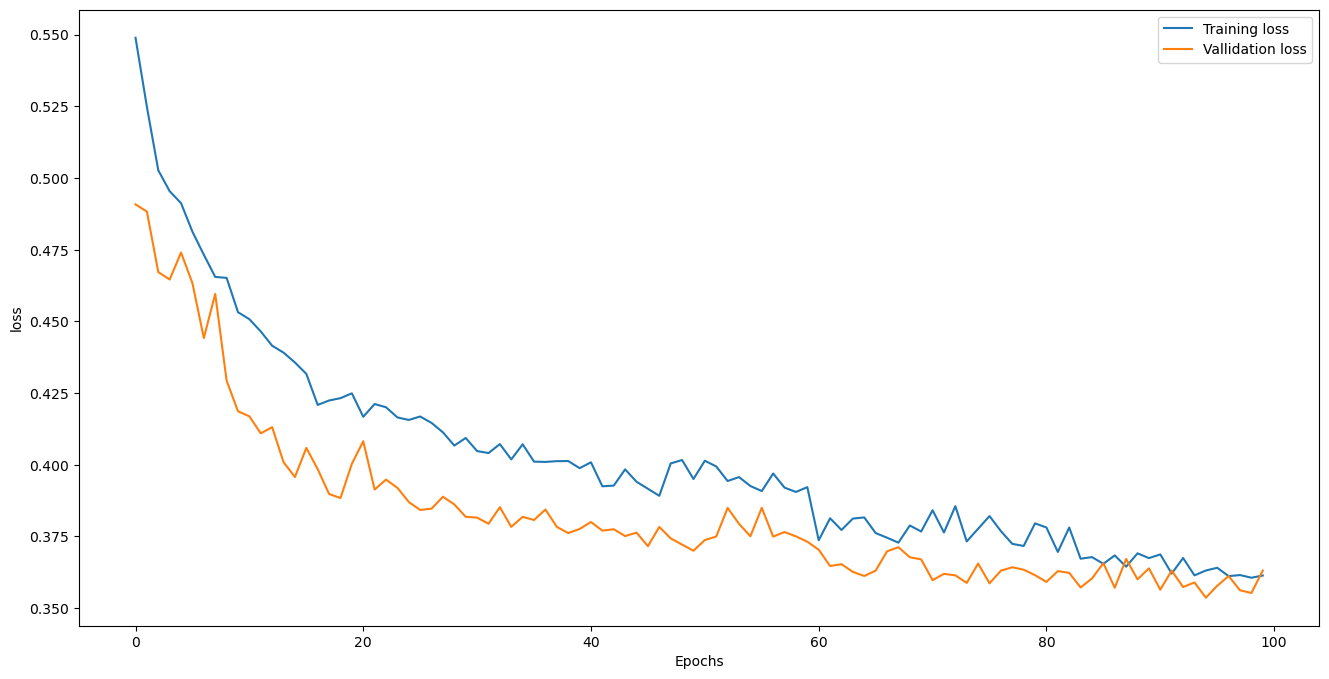

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(model.history['loss'],label='Training loss')
plt.plot(model.history['val_loss'],label='Vallidation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [36]:
nn.evaluate(xtrain,ytrain)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8707 - loss: 0.3165


[0.3260195553302765, 0.8663750290870667]

In [37]:
nn.evaluate(xtest,ytest)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8640 - loss: 0.3446


[0.3495783805847168, 0.862500011920929]

In [38]:
ypred_train=nn.predict(xtrain)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [39]:
ypred_test=nn.predict(xtest)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [40]:
ypred_test[0:10]

array([[0.01210621],
       [0.02250959],
       [0.11715025],
       [0.13453905],
       [0.14264281],
       [0.00782395],
       [0.22182125],
       [0.30053097],
       [0.2444571 ],
       [0.47429696]], dtype=float32)

In [41]:
tresh_hold=0.5
ypred_test_class=[]
for i in ypred_test:
    if i> tresh_hold:
        ypred_test_class.append(1)
    else:
        ypred_test_class.append(0)

In [42]:
 ypred_test_class[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [43]:
tresh_hold=0.5
ypred_train_class=[]
for i in ypred_train:
    if i> tresh_hold:
        ypred_train_class.append(1)
    else:
        ypred_train_class.append(0)

In [44]:
ypred_train_class[0:10]

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Trainnig the model

In [47]:
Accuracy_score=accuracy_score(ytrain,ypred_train_class)
print('Accuracy:',Accuracy_score)

confusion_matrix=confusion_matrix(ytrain,ypred_train_class)
print('Confusion_matrix: \n',confusion_matrix)

classification_report=classification_report(ytrain,ypred_train_class)
print('classification_report: ',classification_report)

Accuracy: 0.866375
Confusion_matrix: 
 [[6139  217]
 [ 852  792]]
classification_report:                precision    recall  f1-score   support

           0       0.88      0.97      0.92      6356
           1       0.78      0.48      0.60      1644

    accuracy                           0.87      8000
   macro avg       0.83      0.72      0.76      8000
weighted avg       0.86      0.87      0.85      8000



# Testing the model

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


accuracy = accuracy_score(ytest, ypred_test_class)
print('Accuracy:', accuracy)


conf_matrix = confusion_matrix(ytest, ypred_test_class)
print('Confusion_matrix:\n', conf_matrix)


class_report = classification_report(ytest, ypred_test_class)
print('Classification Report:\n', class_report)


Accuracy: 0.8625
Confusion_matrix:
 [[1544   63]
 [ 212  181]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

